In [1]:
# pip install XGBOOST

  Obtaining dependency information for XGBOOST from https://files.pythonhosted.org/packages/53/7d/dc4fda290282be0fb45efd4e9ee5bdc225b5690d0f53048a94ec028b6a3b/xgboost-2.1.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


# 데이터 로드

In [2]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('./dataset/FordA_TRAIN.arff')
train_df = pd.DataFrame(data)

data, meta = arff.loadarff('./dataset/FordA_TEST.arff')
test_df = pd.DataFrame(data)

train_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att492,att493,att494,att495,att496,att497,att498,att499,att500,target
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,b'-1'
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,b'1'
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,b'-1'
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,b'-1'
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,b'-1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0.196022,-0.070102,-0.336226,-0.516799,-0.555282,-0.442793,-0.221369,0.025217,0.233320,0.350545,...,1.129082,0.528158,-0.039020,-0.573043,-1.061479,-1.514392,-1.934743,-2.316612,-2.603753,b'-1'
3597,0.041994,0.422255,0.740529,0.975426,1.109891,1.137270,1.058349,0.894955,0.671224,0.421544,...,-0.392667,-0.333749,-0.316543,-0.340299,-0.392876,-0.450805,-0.482609,-0.467769,-0.393755,b'1'
3598,-0.570054,-0.333165,-0.293519,-0.425344,-0.590869,-0.615648,-0.348033,0.275412,1.153586,2.035725,...,0.579700,0.157463,-0.353980,-0.885246,-1.314421,-1.512655,-1.393714,-0.942733,-0.270722,b'-1'
3599,2.006732,2.079150,2.022036,1.867560,1.648112,1.379446,1.093717,0.784057,0.434150,0.029284,...,1.148971,0.928088,0.634953,0.311682,-0.007376,-0.270543,-0.432145,-0.441231,-0.280709,b'1'


In [7]:
print(meta.types)

<bound method MetaData.types of Dataset: FordA
	att1's type is numeric
	att2's type is numeric
	att3's type is numeric
	att4's type is numeric
	att5's type is numeric
	att6's type is numeric
	att7's type is numeric
	att8's type is numeric
	att9's type is numeric
	att10's type is numeric
	att11's type is numeric
	att12's type is numeric
	att13's type is numeric
	att14's type is numeric
	att15's type is numeric
	att16's type is numeric
	att17's type is numeric
	att18's type is numeric
	att19's type is numeric
	att20's type is numeric
	att21's type is numeric
	att22's type is numeric
	att23's type is numeric
	att24's type is numeric
	att25's type is numeric
	att26's type is numeric
	att27's type is numeric
	att28's type is numeric
	att29's type is numeric
	att30's type is numeric
	att31's type is numeric
	att32's type is numeric
	att33's type is numeric
	att34's type is numeric
	att35's type is numeric
	att36's type is numeric
	att37's type is numeric
	att38's type is numeric
	att39's typ

In [3]:
train_df.shape, test_df.shape

((3601, 501), (1320, 501))

# 정상, 비정상 데이터 시각화

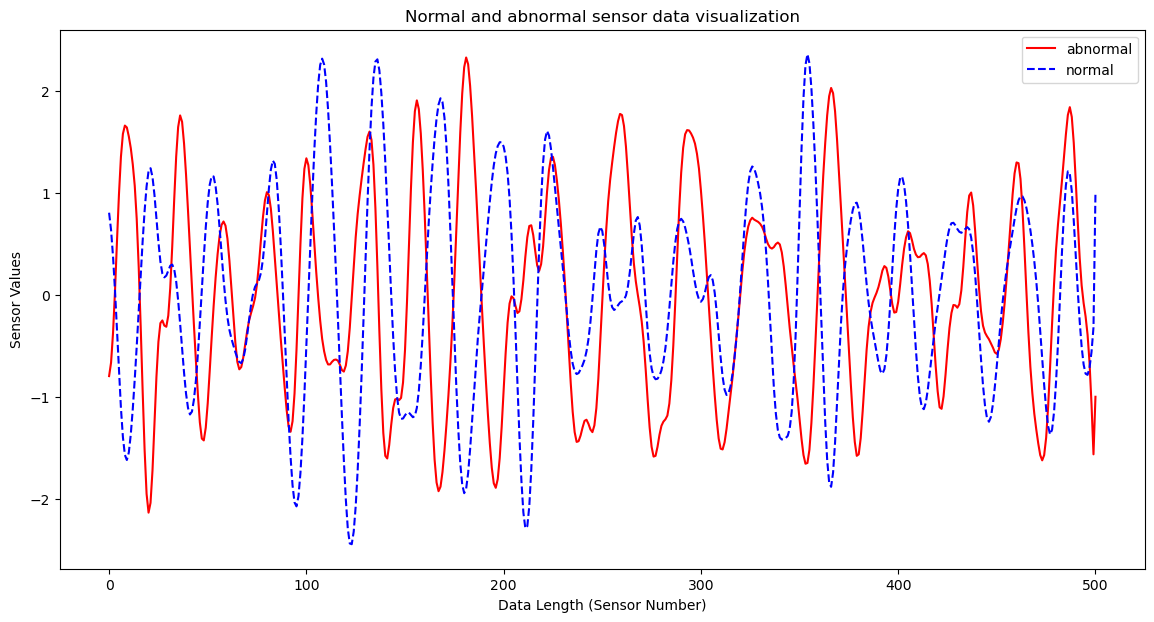

In [25]:
import matplotlib.pyplot as plt

# 인덱스 0번과 1번의 데이터 선택
index_0_data = train_df.iloc[0] # 비정상
index_1_data = train_df.iloc[1] # 정상

# 시각화
plt.figure(figsize=(14, 7))
x = range(len(index_0_data))  # Feature 인덱스

plt.plot(x, index_0_data, label='abnormal', marker='', color='red', linestyle='-')
plt.plot(x, index_1_data, label='normal', marker='', color='blue', linestyle='--')

plt.xlabel('Data Length (Sensor Number)')
plt.ylabel('Sensor Values')
plt.title('Normal and abnormal sensor data visualization')

# x축 레이블을 0, 100, 200, 300, 400, 500 단위로 표시
xticks_positions = [0, 100, 200, 300, 400, 500]
xticks_labels = [str(i) for i in xticks_positions]

plt.xticks(xticks_positions, xticks_labels, rotation=0)  # Feature 이름이 길 경우 가독성을 위해 회전
plt.legend()
plt.show()

# KNN 알고리즘

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드 (예시)
# train_df = pd.read_csv('your_dataset.csv')

# 'target' 열이 있다고 가정하고 이를 제거하여 특징 데이터 준비
X = train_df.drop('target', axis=1)
y = train_df['target']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 데이터 시각화를 위해 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KNN 알고리즘 적용
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# PCA로 축소된 데이터와 KNN 예측 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', s=50, marker='o', label='Test Data')

plt.xlabel('Data Length (Sensor Number)')
plt.ylabel('Feature Weight')
plt.title('Neighborhood components analysis')
plt.legend()
plt.show()

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# KMeans Clustering

/Users/1tae/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


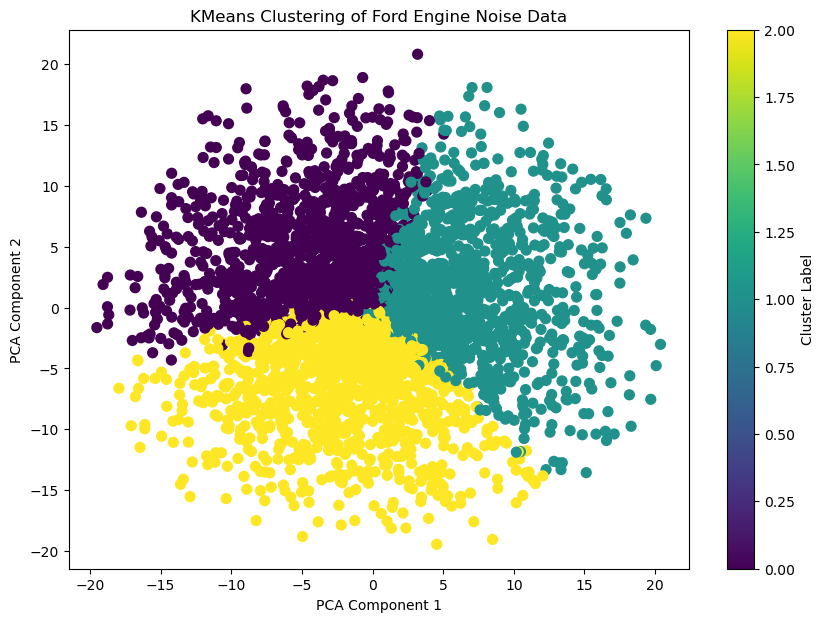

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

# 'target' 열을 제거하여 군집화를 위한 데이터 준비
X = train_df.drop('target', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 데이터 시각화를 위해 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 클러스터링 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA로 축소된 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('KMeans Clustering of Ford Engine Noise Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# 데이터 기본 정보 확인
print(df.info())
print(df.describe())

# 데이터의 특성 분포 시각화
sns.pairplot(df.sample(100))  # 데이터 샘플링하여 시각화
plt.show()

# 타겟 열 제거
X = df.drop('target', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA로 축소된 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('KMeans Clustering of Sensor Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, att1 to target
dtypes: float64(500), object(1)
memory usage: 13.8+ MB
None
              att1         att2         att3         att4         att5  \
count  3601.000000  3601.000000  3601.000000  3601.000000  3601.000000   
mean     -0.016708    -0.015270    -0.013605    -0.011943    -0.009966   
std       1.058455     1.051904     1.044560     1.042573     1.046933   
min      -3.933454    -3.656912    -3.479467    -3.595350    -3.773891   
25%      -0.685693    -0.699526    -0.688302    -0.709732    -0.694991   
50%      -0.007573    -0.003044    -0.003066     0.008598     0.001042   
75%       0.660360     0.674898     0.683698     0.679474     0.697530   
max       3.503936     3.369278     3.498286     3.493830     3.293318   

              att6         att7         att8         att9        att10  ...  \
count  3601.000000  3601.000000  3601.000000  3601.000000  3601.000000  ...   
mean

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x16970a020> (for post_execute):


ValueError: Image size of 125000x125000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 125000x125000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 125000x125000 with 31563 Axes>